In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Load the Excel file with all sheets
file_path = './GPS data_updated.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

In [3]:
# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

In [4]:
# Loop through each sheet and append the data to the merged_data DataFrame
for sheet_name, sheet_data in excel_data.items():
    merged_data = pd.concat([merged_data, sheet_data], ignore_index=True)

In [5]:
# Save the merged data into a new Excel file
output_file = 'merged_GPS_data.xlsx'
merged_data.to_excel(output_file, index=False)

In [6]:
merged_data.head()

,TP_ID,TRAIL_ID,USER_ID,Y_COORDINATE,X_COORDINATE,TIME,Formatted Time,DATE,Formatted Date,SPEED,HEIGHT,SPEED(Km/hr),Y_WGS84,X_WGS84,Dist between 2 points(Km),Time difference between 2 points(hrs),Avg SPEED,Acceleration at each point(Km/hr^2)
0,1,1,Bullis 1,60292653,15246578,121533,12:15:33,90611,09-06-11,50,-1,0.50,60.487755,15.410963,0.000000,0.000000,0.000000,0.000000
1,1,2,Bullis 1,60292797,15247460,121825,12:18:25,90611,09-06-11,2170,-1,21.70,60.487995,15.412433,0.084827,0.047778,1.775452,454.186047
2,1,3,Bullis 1,60292668,15248432,121855,12:18:55,90611,09-06-11,2950,-1,29.50,60.487780,15.414053,0.091900,0.008333,11.028031,3540.000000
3,1,4,Bullis 1,60293713,15251138,121930,12:19:30,90611,09-06-11,4460,-1,44.60,60.489522,15.418563,0.313896,0.009722,32.286413,4587.428571
4,1,5,Bullis 1,60294654,15253287,122000,12:20:00,90611,09-06-11,3779,-1,37.79,60.491090,15.422145,0.262480,0.008333,31.497630,4534.800000


In [ ]:
#merged_data.isnull().sum()
#merged_data.isna().sum()

In [7]:
# Function to calculate trip-level stats for each group
def calculate_trip_stats(group):
    # Calculate average acceleration on the trip (mean of the acceleration at each point)
    average_acceleration = group['Acceleration at each point(Km/hr^2)'].mean()
    
    # Calculate total trip duration (sum of time differences)
    trip_duration = group['Time difference between 2 points(hrs)'].sum()
    
    # Calculate total trip distance (sum of distances between points)
    trip_distance = group['Dist between 2 points(Km)'].sum()
    
    # Assign the calculated values to the group
    group['Avg Acceleration on the Trip'] = average_acceleration
    group['Trip Duration (hrs)'] = trip_duration
    group['Trip Distance (Km)'] = trip_distance
    
    return group

In [8]:
# Group by 'TP_ID' and 'TRAIL_ID' and apply the calculation function
merged_data = merged_data.groupby(['TP_ID ', 'TRAIL_ID']).apply(calculate_trip_stats)

# Display the updated DataFrame with the new columns
print(merged_data.head())

/var/folders/01/b5x3fw5s02v_bktqct0c1hkw0000gn/T/ipykernel_10297/570252527.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  merged_data = merged_data.groupby(['TP_ID ', 'TRAIL_ID']).apply(calculate_trip_stats)


   TP_ID   TRAIL_ID   USER_ID  Y_COORDINATE  X_COORDINATE    TIME  \
0       1         1  Bullis 1      60292653      15246578  121533   
1       1         2  Bullis 1      60292797      15247460  121825   
2       1         3  Bullis 1      60292668      15248432  121855   
3       1         4  Bullis 1      60293713      15251138  121930   
4       1         5  Bullis 1      60294654      15253287  122000   

  Formatted Time   DATE Formatted Date  SPEED  ... SPEED(Km/hr)    Y_WGS84  \
0       12:15:33  90611       09-06-11     50  ...         0.50  60.487755   
1       12:18:25  90611       09-06-11   2170  ...        21.70  60.487995   
2       12:18:55  90611       09-06-11   2950  ...        29.50  60.487780   
3       12:19:30  90611       09-06-11   4460  ...        44.60  60.489522   
4       12:20:00  90611       09-06-11   3779  ...        37.79  60.491090   

     X_WGS84  Dist between 2 points(Km)  \
0  15.410963                   0.000000   
1  15.412433                  

In [9]:
merged_data.to_excel(output_file, index=False)

print(f"Updated data saved to: {output_file}")

Updated data saved to: merged_GPS_data.xlsx


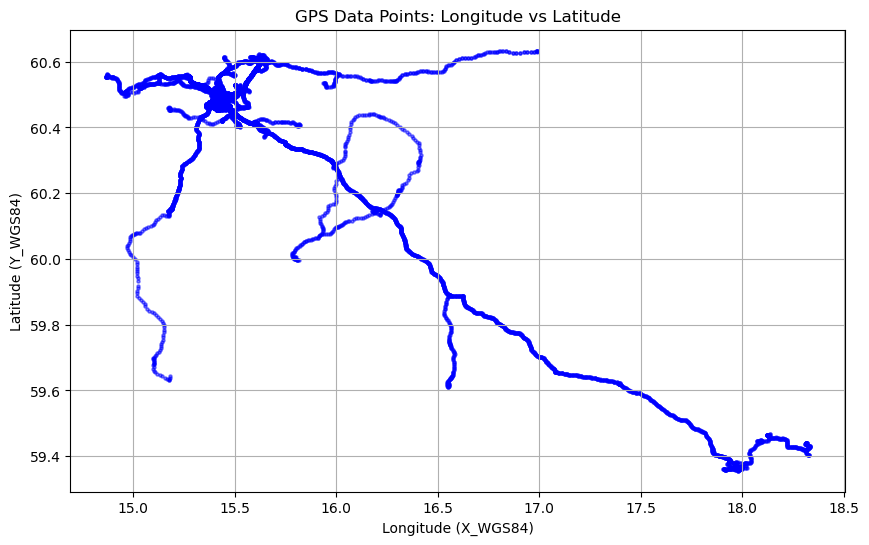

In [27]:
# Create a scatter plot of longitude (X_WGS84) vs latitude (Y_WGS84)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['X_WGS84'],merged_data['Y_WGS84'], s=5, c='blue', alpha=0.5)
plt.title('GPS Data Points: Longitude vs Latitude')
plt.xlabel('Longitude (X_WGS84)')
plt.ylabel('Latitude (Y_WGS84)')
plt.grid(True)
plt.show()

#### This scatter plot visualizes all the GPS points based on their longitude (X_WGS84) and latitude (Y_WGS84). The lines indicate the movement paths tracked by the GPS device over time.

/var/folders/01/b5x3fw5s02v_bktqct0c1hkw0000gn/T/ipykernel_10297/3122148116.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=merged_data['X_WGS84'],


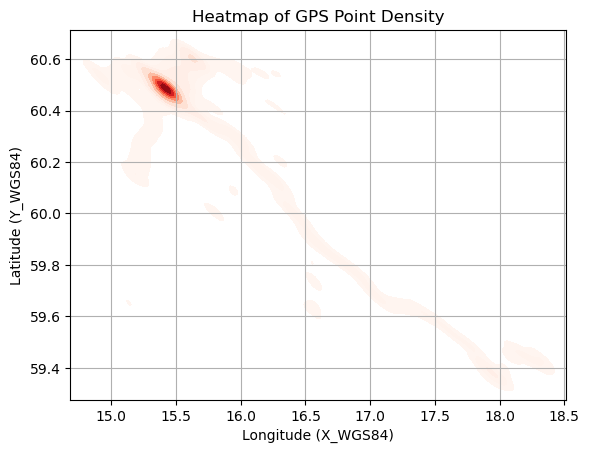

In [34]:
# Create a heatmap to show the density of GPS data points
sns.kdeplot(x=merged_data['X_WGS84'], 
            y=merged_data['Y_WGS84'], 
            cmap="Reds", 
            shade=True,
            bw_adjust=0.5)
plt.title('Heatmap of GPS Point Density')
plt.xlabel('Longitude (X_WGS84)')
plt.ylabel('Latitude (Y_WGS84)')
plt.grid(True)
plt.show()

#### The heatmap provides a density-based visualization of the GPS data points. The darker red area in the center around latitude 60.4 and longitude 15.5 indicates that there is a high concentration of GPS points in that region. The area between longitude 15.5 to 18 has fewer data points, shown by the lighter areas.

In [28]:
# Create a map centered at the mean latitude and longitude
mean_lat = merged_data['Y_WGS84'].mean()
mean_lon = merged_data['X_WGS84'].mean()

# Create a Folium map centered on the average latitude and longitude
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)

# Add GPS points as markers on the map
for _, row in merged_data.iterrows():
    folium.Marker(location=[row['Y_WGS84'], row['X_WGS84']]).add_to(m)

# Save the map to an HTML file and display it
map_file = 'gps_data_map.html'
m.save(map_file)

map_file

'gps_data_map.html'

In [30]:
from folium.plugins import HeatMap
# Prepare the data for the heatmap (latitude and longitude pairs)
heat_data = [[row['Y_WGS84'], row['X_WGS84']] for index, row in merged_data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file and display it
map_file = 'gps_data_heatmap.html'
m.save(map_file)

map_file

'gps_data_heatmap.html'

In [32]:
from folium.plugins import FastMarkerCluster
# Prepare the data for the cluster (latitude and longitude pairs)
marker_data = [[row['Y_WGS84'], row['X_WGS84']] for index, row in merged_data.iterrows()]

# Add the FastMarkerCluster to the map
FastMarkerCluster(marker_data).add_to(m)

# Save the map to an HTML file and display it
map_file = 'gps_data_clustered_map.html'
m.save(map_file)

map_file

'gps_data_clustered_map.html'

#### The above three methods are the repeated steps to show the GPS points and heat map on a map. It is very slow in rendering. Hence, I keep both the methods to show my output.